In [1]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy import sparse


class SpectralClustering:
    
    def __init__(self, n_clusters=2, affinity='rbf', gamma=1.0, n_neighbors=10):
        self.n_clusters = n_clusters
        self.affinity = affinity
        self.gamma = gamma
        self.n_neighbors = n_neighbors
    
    def fit(self, X):
        if self.affinity == 'rbf':
            self.affinity_matrix_ = self._rbf_kernel(X, gamma=self.gamma)
        elif self.affinity == 'knn':
            self.affinity_matrix_ = self._knn_graph(X, k=self.n_neighbors)
        else:
            raise ValueError("Invalid affinity type. Must be 'rbf' or 'knn'")
        
        degree_matrix = np.diag(np.sum(self.affinity_matrix_, axis=1))
        laplacian_matrix = degree_matrix - self.affinity_matrix_
        eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
        
        idx = eigenvalues.argsort()
        eigenvectors = eigenvectors[:,idx]
        
        k = self.n_clusters
        new_features = eigenvectors[:, :k]
        
        kmeans = KMeans(n_clusters=self.n_clusters)
        kmeans.fit(new_features)
        self.labels_ = kmeans.labels_
        
    def predict(self, X):
        if self.affinity == 'rbf':
            affinity_matrix = self._rbf_kernel(X, self.X_, gamma=self.gamma)
        elif self.affinity == 'knn':
            affinity_matrix = self._knn_graph(X, self.X_, k=self.n_neighbors)
        
        degree_matrix = np.diag(np.sum(self.affinity_matrix_, axis=1))
        laplacian_matrix = degree_matrix - self.affinity_matrix_
        new_features = np.dot(affinity_matrix, self.eigenvectors_)
        return self.kmeans_.predict(new_features)
    
    def _rbf_kernel(self, X, Y=None, gamma=1.0):
        if Y is None:
            Y = X
        pairwise_dists = cdist(X, Y, 'euclidean')
        return np.exp(-gamma * pairwise_dists ** 2)
    
    def _knn_graph(self, X, Y=None, k=10):
        if Y is None:
            Y = X
        pairwise_dists = cdist(X, Y, 'euclidean')
        knn_indices = np.argsort(pairwise_dists, axis=1)[:, 1:k+1]
        n_samples = pairwise_dists.shape[0]
        row_indices = np.repeat(np.arange(n_samples), k)
        col_indices = knn_indices.ravel()
        data = np.ones(n_samples*k)
        knn_graph = sparse.csr_matrix((data, (row_indices, col_indices)), shape=(n_samples, n_samples))
        return knn_graph

/home/shushanik/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


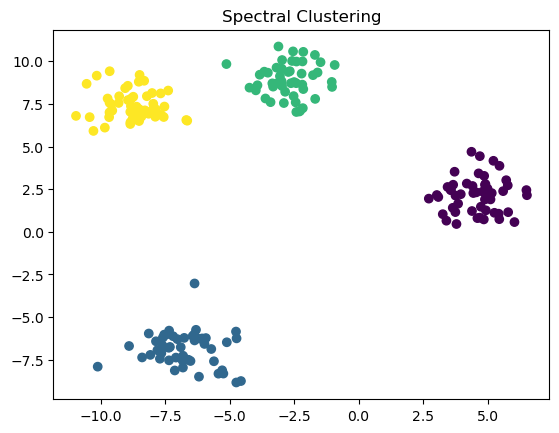

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=200, centers=4, random_state=42)

knn_graph = kneighbors_graph(X, n_neighbors=10, mode='connectivity')

sc = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', n_neighbors=10)
sc.fit(X)
labels = sc.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Spectral Clustering")
plt.show()

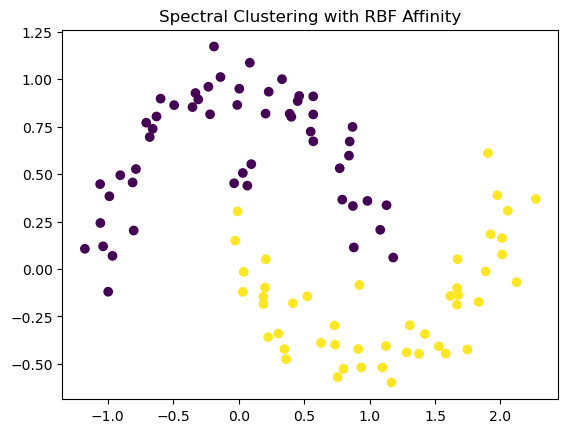

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

model = SpectralClustering(n_clusters=2, affinity='rbf', gamma=10)
model.fit(X_std)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
plt.title('Spectral Clustering with RBF Affinity')
plt.show()